# HW1 Ziyue Wang

In [419]:
set.seed(0)

In [420]:
n_batch <- 100 
# With high probablity the total number of patients that... 
# ...arrive before 4pm will be less than 100. 

# If more than 100 we have a loop to continue adding patients as written down below.

arrive_gap <- rexp(n=n_batch, rate=1/10)
meet_time <- runif(n=n_batch, 5, 20)

while (sum(arrive_gap) <= (16-9) * 60) {
    print("Somehow we have an unbelievable number of patients before 4pm")
    arrive_time <- c(arrive_gap, rexp(n=n_batch, rate=1/10))
    meet_time <- c(meet_time, runif(n=n_batch, 5, 20))
}

## How many patients visited our office?

In [421]:
last_patient <- tail(which(cumsum(arrive_gap) <= (16-9) * 60), n=1)
last_patient 

if (length(last_patient) == 0) {
    print("Nobody comes before 4pm, what happened?")
}

[1] 43

In [422]:
arrive_time <- cumsum(arrive_gap)

doctor_schedule <- data.frame(matrix(0, last_patient+1, 3))
colnames(doctor_schedule) <- c('A', 'B', 'C')

wait_time <- c()

for (i in 1:last_patient) {
    hello_doctor <- doctor_schedule[i, ]
    next_avaliable <- which.min(hello_doctor)
    
    if (hello_doctor[next_avaliable] <= arrive_time[i]) {
        ### There is at least one doctor avaliable for the ith patient on arrival. ###

        doctor_schedule[i+1, ] <- doctor_schedule[i, ] 
        # Keep the current schedule of other two doctors for next patient.
        doctor_schedule[i+1, next_avaliable] <- arrive_time[i] + meet_time[i]
        # Change the meeting doctor's schedule.
    
    } else {
        ### No doctor is avaliable at this time. Let's wait. ###
        
        wait_time <- c(wait_time, hello_doctor[next_avaliable] - arrive_time[i])
        doctor_schedule[i+1, ] <- doctor_schedule[i, ] 
        doctor_schedule[i+1, next_avaliable] <- doctor_schedule[i, next_avaliable] + meet_time[i]
        # Notice that the way we calculate next avaliable time for this doctor...
        # ...is different comparing to the above chunk.
        
    }
    
    ### Poor doctors, they couldn't even take a break. ###
}

## How many had to wait?

In [423]:
how_many_had_to_wait <- length(wait_time) 
how_many_had_to_wait

[1] 4

## What was their average wait? 

In [424]:
what_was_their_average_wait <- mean(as.numeric(wait_time))
if (is.na(what_was_their_average_wait)) what_was_their_average_wait <- 0 # in case no one ever waited. 
what_was_their_average_wait # in minutes


[1] 3.490962

## When did the office close?

In [425]:
when_did_the_office_close <- format(as.POSIXct((max(doctor_schedule) + 9*60) * 60, 
                                        origin = "1970-01-01", tz = "UTC"),
                                        "%H:%M")
if (when_did_the_office_close <= '16:00') when_did_the_office_close <- '16:00'
# In case all patients are treated before 4pm (and the next potential patient will arrives after 4pm).

# It depends on how you understand '... closes when the last patient is through with the doctor'.
# The question is how do you know this is the last patient before 4pm. You don't. 
# So I think it's reasonable to wait until 4pm to close. 
# This definition will certainly change the distribution of 'close time' as a random variable.


when_did_the_office_close 

[1] "16:09"

## Repeat 100 times

* Write above chunks of code into a function and repeat the simulation for 100 times. 
* Comments are deleted. Please see above chunks for code explaination. 

In [426]:
Hurtado_Health_Center <- function(n_rep) {
    result <- data.frame(matrix(, n_rep, 4))
    for (n in 1:n_rep) {
        n_batch <- 100 
        arrive_gap <- rexp(n=n_batch, rate=1/10)
        meet_time <- runif(n=n_batch, 5, 20)

        while (sum(arrive_gap) <= (16-9) * 60) {
            print("Somehow we have an unbelievable number of patients before 4pm")
            arrive_time <- c(arrive_gap, rexp(n=n_batch, rate=1/10))
            meet_time <- c(meet_time, runif(n=n_batch, 5, 20))
        }

        last_patient <- tail(which(cumsum(arrive_gap) <= (16-9) * 60), n=1)
        result[n, 1] <- last_patient 

        if (length(last_patient) == 0) {
            print("Nobody comes before 4pm, what happened?")
        }

        arrive_time <- cumsum(arrive_gap)

        doctor_schedule <- data.frame(matrix(0, last_patient+1, 3))
        colnames(doctor_schedule) <- c('A', 'B', 'C')

        wait_time <- c()

        for (i in 1:last_patient) {
            hello_doctor <- doctor_schedule[i, ]
            next_avaliable <- which.min(hello_doctor)

            if (hello_doctor[next_avaliable] <= arrive_time[i]) {

                doctor_schedule[i+1, ] <- doctor_schedule[i, ] 
                doctor_schedule[i+1, next_avaliable] <- arrive_time[i] + meet_time[i]
  
            } else {
  
                wait_time <- c(wait_time, hello_doctor[next_avaliable] - arrive_time[i])
                doctor_schedule[i+1, ] <- doctor_schedule[i, ] 
                doctor_schedule[i+1, next_avaliable] <- doctor_schedule[i, next_avaliable] + meet_time[i]
  
            }
        }

        how_many_had_to_wait <- length(wait_time) 
        result[n, 2] <- how_many_had_to_wait

        what_was_their_average_wait <- mean(as.numeric(wait_time))
        if (is.na(what_was_their_average_wait)) what_was_their_average_wait <- 0 
        result[n, 3] <- what_was_their_average_wait 
        
        when_did_the_office_close <- max(doctor_schedule)                                
        if (when_did_the_office_close <= 420) when_did_the_office_close <- 420
        result[n, 4] <- when_did_the_office_close 
    }
    return(result)
}

In [427]:
res <- Hurtado_Health_Center(100)
head(res)
tail(res)

,X1,X2,X3,X4
,<int>,<int>,<dbl>,<dbl>
1,42,2,2.049634,430.4233
2,47,6,2.563495,434.8551
3,49,7,2.035736,426.2373
4,37,3,4.354265,426.7133
5,31,3,8.758707,420.4448
6,32,2,3.406471,420.0000


,X1,X2,X3,X4
,<int>,<int>,<dbl>,<dbl>
95,46,3,2.796880,426.8117
96,52,7,6.390701,432.3017
97,40,2,3.625204,435.1705
98,48,7,4.815937,437.7422
99,44,17,6.033319,420.0000
100,40,2,3.087213,422.2469


[1] "Meidan for patients # is 41"
[1] "50% interval for patients # is 37 to 47"


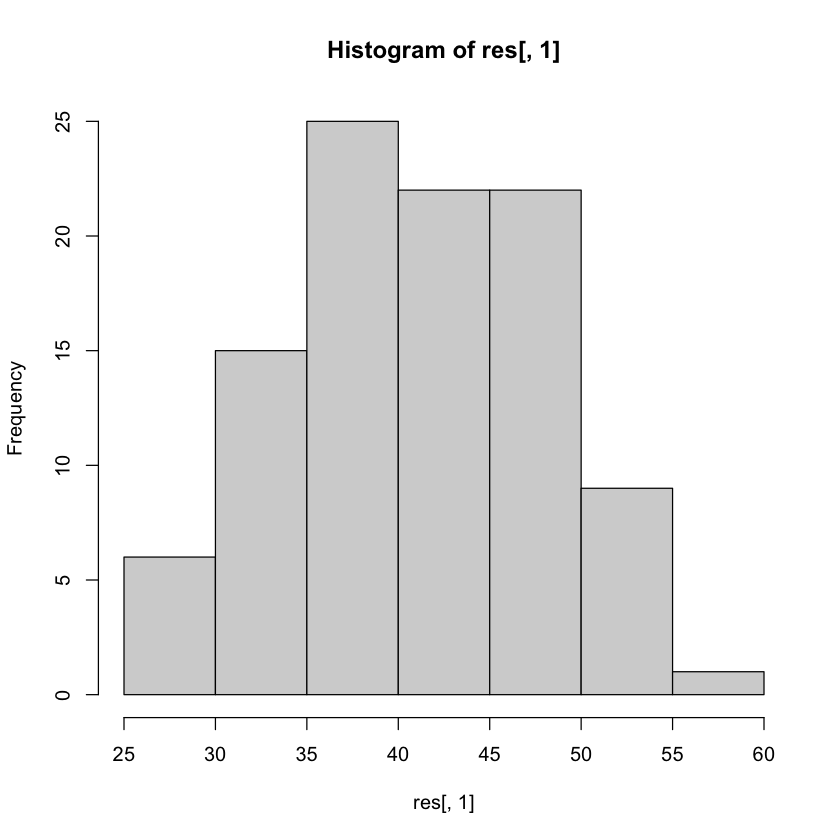

In [428]:
print(paste('Meidan for patients # is', quantile(res[,1], probs=.5)))
print(paste('50% interval for patients # is', quantile(res[,1], probs=.25),
            'to', quantile(res[,1], probs=.75)))
hist(res[,1])

[1] "Meidan for waited count is 5"
[1] "50% interval for waited count is 2.75 to 10"


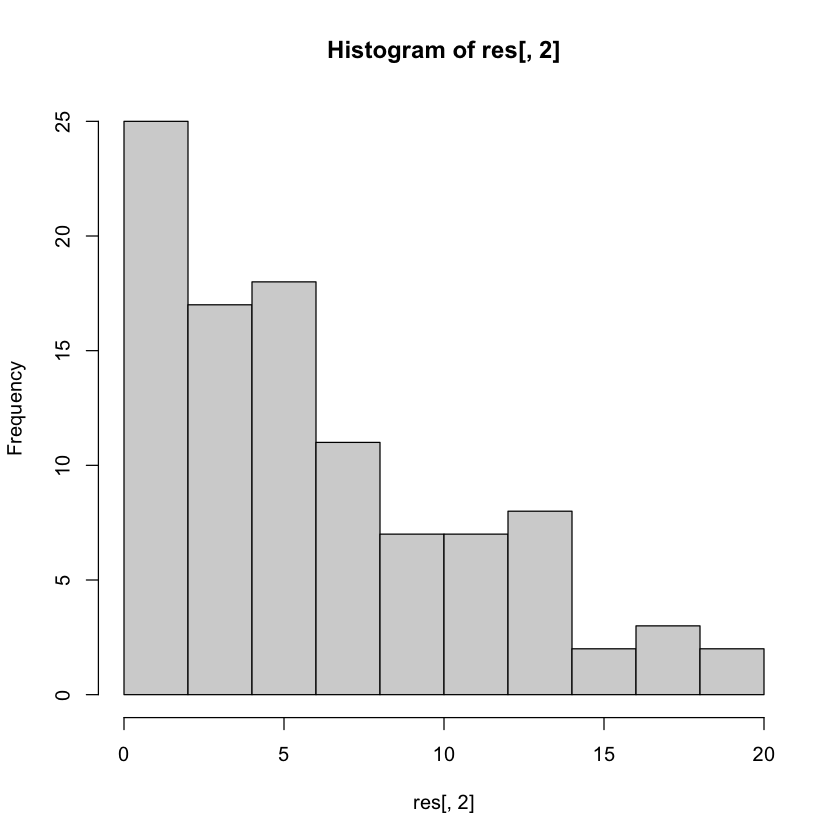

In [429]:
print(paste('Meidan for waited count is', quantile(res[,2], probs=.5)))
print(paste('50% interval for waited count is', quantile(res[,2], probs=.25),
            'to', quantile(res[,2], probs=.75)))
hist(res[,2])

[1] "Meidan for average wait time is 4.12498239125524"
[1] "50% interval for average wait time is 2.56338285421338 to 5.32078694792142"


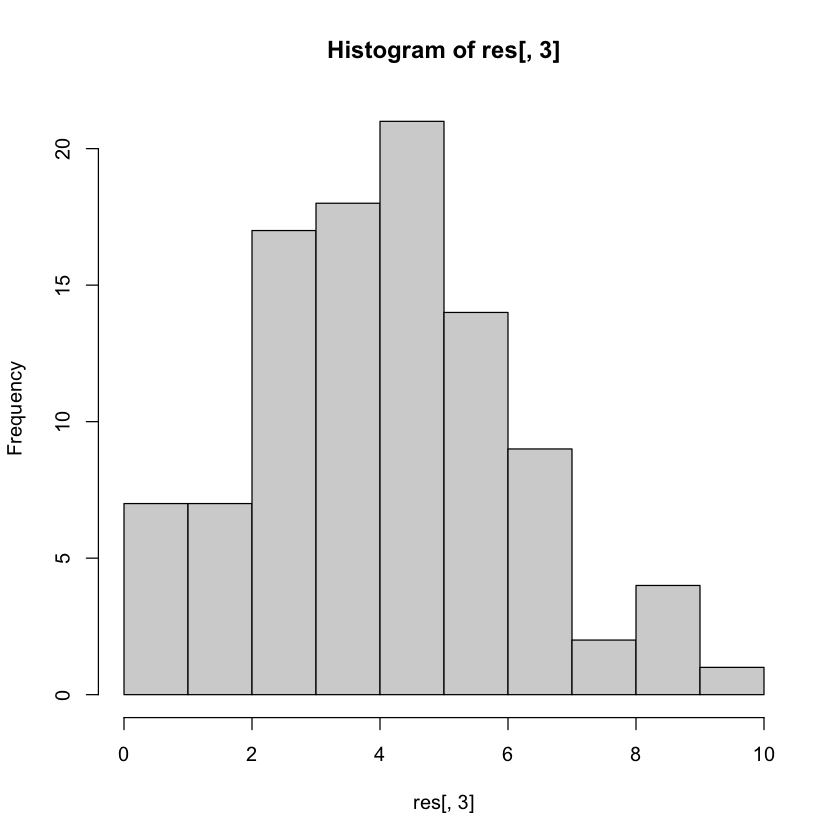

In [430]:
print(paste('Meidan for average wait time is', quantile(res[,3], probs=.5)))
print(paste('50% interval for average wait time is', quantile(res[,3], probs=.25),
            'to', quantile(res[,3], probs=.75)))
hist(res[,3])

[1] "Meidan for close time (in minutes after 9am) is 424.198327354349"
[1] "50% interval for close time (in minutes after 9am) is 420 to 430.903126228668"


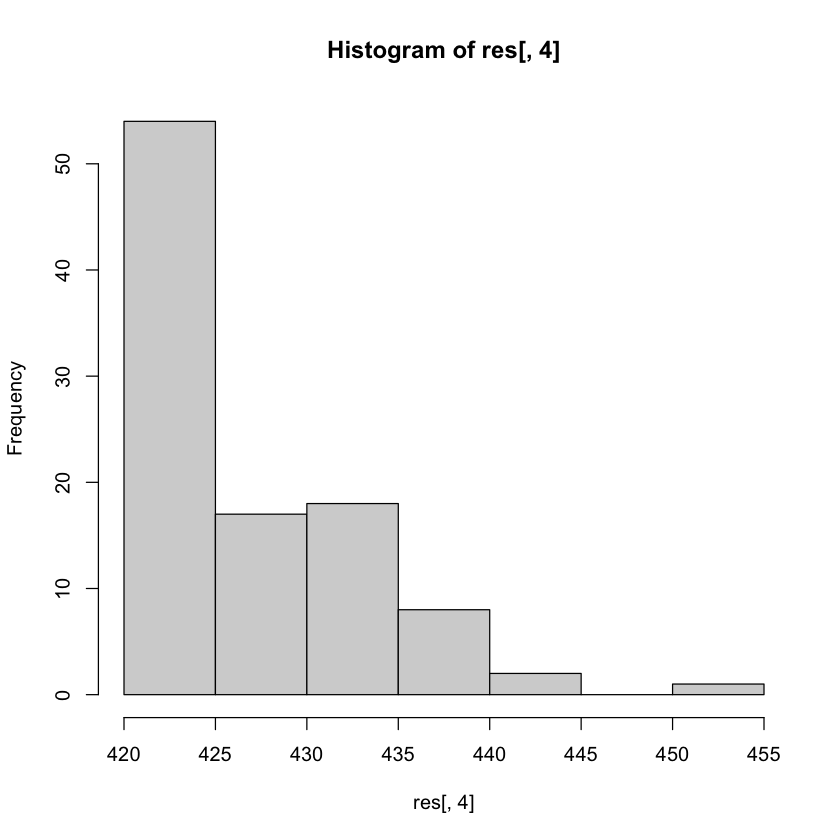

In [431]:
print(paste('Meidan for close time (in minutes after 9am) is', quantile(res[,4], probs=.5)))
print(paste('50% interval for close time (in minutes after 9am) is', quantile(res[,4], probs=.25),
            'to', quantile(res[,4], probs=.75)))
hist(res[,4])